# Problem Statement:

Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. The file ex1data2.txt contains a training set of housing prices in Portland,Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms and the third column is the price of the house.
> 
Dataset is like below :

|Size of the house (in square feet)|	Number of bedrooms|	Price of the house|
|----------------------------------| -------------------- |-------------------|
|2104                              | 3                    |	399900            |
|1600|	3|	329900|
|2400|	3|	369000|


Now we have to predict housing prices in Portland, Oregon.(including which is not mention in our example dataset).

### Dependencies

- jupyter
- numpy
- matplotlib

Install dependencies using [pip](https://pip.pypa.io/en/stable/)



In [43]:
print ("Om Mahaa Ganapataye Namah")

Om Mahaa Ganapataye Namah


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
np.set_printoptions(suppress=True) 
from IPython.display import Image

In [45]:
data = np.loadtxt("D:/dat1/exdata.txt",dtype=np.float64,delimiter=",")
data[:5,::] #dataset loaded demonstration

array([[  2104.,      3., 399900.],
       [  1600.,      3., 329900.],
       [  2400.,      3., 369000.],
       [  1416.,      2., 232000.],
       [  3000.,      4., 539900.]])

In [36]:
data

array([[  2104.,      3., 399900.],
       [  1600.,      3., 329900.],
       [  2400.,      3., 369000.],
       [  1416.,      2., 232000.],
       [  3000.,      4., 539900.],
       [  1985.,      4., 299900.],
       [  1534.,      3., 314900.],
       [  1427.,      3., 198999.],
       [  1380.,      3., 212000.],
       [  1494.,      3., 242500.],
       [  1940.,      4., 239999.],
       [  2000.,      3., 347000.],
       [  1890.,      3., 329999.],
       [  4478.,      5., 699900.],
       [  1268.,      3., 259900.],
       [  2300.,      4., 449900.],
       [  1320.,      2., 299900.],
       [  1236.,      3., 199900.],
       [  2609.,      4., 499998.],
       [  3031.,      4., 599000.],
       [  1767.,      3., 252900.],
       [  1888.,      2., 255000.],
       [  1604.,      3., 242900.],
       [  1962.,      4., 259900.],
       [  3890.,      3., 573900.],
       [  1100.,      3., 249900.],
       [  1458.,      3., 464500.],
       [  2526.,      3., 46

In [46]:
x=data[::,0:2]
Y = data[::,-1:] #Price
bed=x[::,-1:]  ####numbers of bedrooms
siz=x[::,0:1]  ####size of house in sqft

In [39]:
data[:5,:]

array([[  2104.,      3., 399900.],
       [  1600.,      3., 329900.],
       [  2400.,      3., 369000.],
       [  1416.,      2., 232000.],
       [  3000.,      4., 539900.]])

In [40]:
# x[::,1:]
#x[::,0:1]
#x[:,0:1]

data.shape

(47, 3)

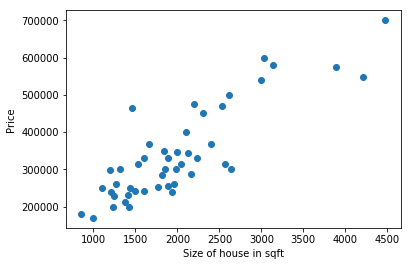

In [47]:
######price Vs size of house in sqft plotting
plt.scatter(siz,Y)
plt.xlabel("Size of house in sqft")
plt.ylabel("Price ")
plt.show()

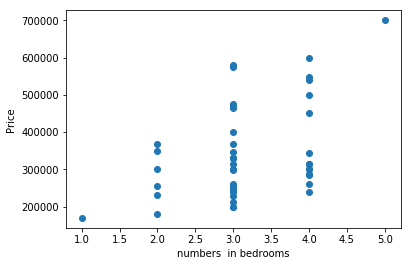

In [48]:
######price Vs number of bedrooms in plotting
plt.scatter(bed,Y)
plt.xlabel("numbers  in bedrooms")
plt.ylabel("Price ")
plt.show()


In [49]:
a,b=x.shape
print (a,b)
np.ones((a))

47 2


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [50]:
Theta=np.random.rand(1,3)
print(Theta)
Theta.transpose()

[[0.86055203 0.45717188 0.74299088]]


array([[0.86055203],
       [0.45717188],
       [0.74299088]])

In [51]:
# introduce weights of hypothesis (randomly initialize)
Theta = np.random.rand(1,3)
# m is total example set , n is number of features
m,n = x.shape
# print(np.ones((m,3)))
# add bias to input matrix by simple make X0 = 1 for all
X_bias = np.ones((m,n+1))
X_bias[::,1:] =x
# output first 5 X_bias examples
print ("X_bias = \n",X_bias[0:5,:])
print ("Y = \n",Y[0:5,::])

X_bias = 
 [[   1. 2104.    3.]
 [   1. 1600.    3.]
 [   1. 2400.    3.]
 [   1. 1416.    2.]
 [   1. 3000.    4.]]
Y = 
 [[399900.]
 [329900.]
 [369000.]
 [232000.]
 [539900.]]


In [66]:
X_bias.size

141

In [11]:
Y.shape

(47, 1)

In [56]:
#feature Scaling
# it also protect program from overflow error
mean_size = np.mean(X_bias[::,1:2])    ####mean of the size of the rooms in sqft
mean_bedroom = np.mean(X_bias[::,2:])     #####mean of the bedrooms
size_std = np.std(X_bias[::,1:2])        ######standard deviation  of the size of the rooms
bedroom_std = np.std(X_bias[::,2:])      ######standard deviation of the bedrooms
X_bias[::,1:2] = (X_bias[::,1:2] - mean_size)/ (size_std)   #####  range of size: -1 < size < +1
X_bias[::,2:] = (X_bias[::,2:] - mean_bedroom)/ (bedroom_std)   ##### range of bedroom: -1 < bedroom < +1
X_bias[0:5,::]      ####displaying some of the valuess

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

In [57]:
#define function to find cost
def cost(X_bias,Y,Theta):
    np.seterr(over='raise')    ###handling with floating vaues
    m,n = x.shape
    hypothesis = X_bias.dot(Theta.transpose())    # y = xTx 
    return (1/(2.0*m))*((np.square(hypothesis-Y)).sum(axis=0)) 

In [63]:
print (X_bias[0:5,:])
print ('/n')
print ('Theta Values ' ,Theta)
print ('/n')
X_bias.dot(Theta.transpose())
print(Theta[0,0]) 

[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]
/n
Theta Values  [[340412.65953011  72655.84621595  59125.40416724]]
/n
340412.6595301094


In [59]:
#function gradient descent algorithm from minimizing theta
def gradientDescent(X_bias,Y,Theta,iterations,alpha):
    count = 1
    cost_log = np.array([])
    while(count <= iterations):
        hypothesis = X_bias.dot(Theta.transpose())
        temp0 = Theta[0,0] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,0:1])).sum(axis=0)
        temp1 = Theta[0,1] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,1:2])).sum(axis=0)
        temp2 = Theta[0,1] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,-1:])).sum(axis=0)
        Theta[0,0] = temp0
        Theta[0,1] = temp1
        Theta[0,2] = temp2
        cost_log = np.append(cost_log,cost(X_bias,Y,Theta))
        count = count + 1
    plt.plot(np.linspace(1,iterations,iterations,endpoint=True),cost_log)
    plt.title("Iteration vs Cost graph ")
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost of Theta")
    plt.show()
    return Theta

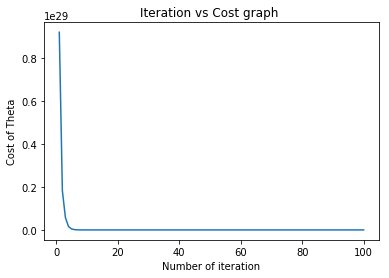

[[340412.65953011  72655.84621595  59125.40416724]]


In [60]:
alpha = 0.3
iterations = 100
Theta = gradientDescent(X_bias,Y,Theta,iterations,alpha)
print (Theta)

In [61]:
# predict the price of a house with 1650 square feet and 3 bedrooms
# add bias unit 1.0
X_predict = np.array([1.0,1650.0,3]) 
#feature scaling the data first
X_predict[1] = (X_predict[1] - mean_size)/ (size_std) 
X_predict[2] = (X_predict[2]- mean_bedroom)/ (bedroom_std)
hypothesis = X_predict.dot(Theta.transpose())
print ("Cost of house with 1650 sq ft and 3 bedroom is ",hypothesis)

Cost of house with 1650 sq ft and 3 bedroom is  [294637.10367102]


# 

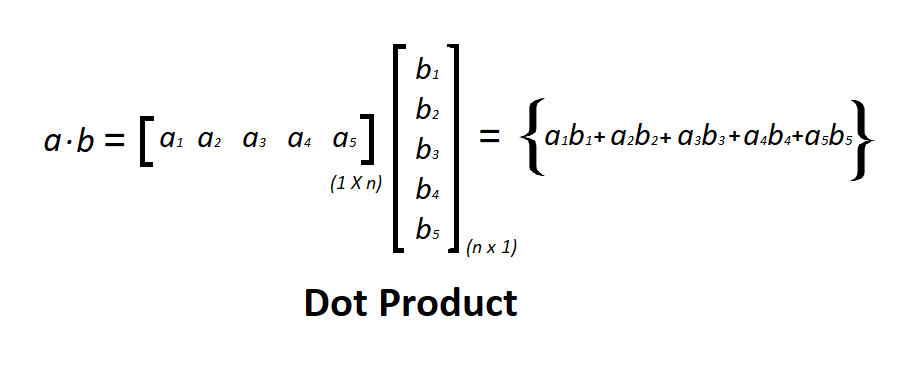

In [62]:
Image("D:/Ana/dotproduct.png",width=520,height=315)

In [4]:
import numpy as np
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 10], [15, 20]])
c = a*b

In [5]:
print('Matrix a:\n', a)
print('Matrix b:\n', b)
print('Resultant Matrix:\n ', c)

Matrix a:
 [[1 2]
 [3 4]]
Matrix b:
 [[ 5 10]
 [15 20]]
Resultant Matrix:
  [[ 5 20]
 [45 80]]


In [6]:
c.T

array([[ 5, 45],
       [20, 80]])

In [106]:
c

array([[ 5, 20],
       [45, 80]])

In [7]:
Theta

NameError: name 'Theta' is not defined

In [108]:
Theta.T

array([[0.13319351],
       [0.91836277],
       [0.56175839]])

In [10]:
X_bias * np.dot(Theta)

NameError: name 'X_bias' is not defined

In [ ]:
# y = c + mx. In this case yhat = theta[0][0]+ theta[0][1]*x


In [18]:
a1 = np.array([2,4,6,8,10,12])
#a2 = np.array([2,3,4,5,6,7]).reshape(2,3)
a2 = np.array([2,3,4,5,6,7])
np.dot(a1,a2)

224

In [20]:
2* 2 + 4 * 3 + 6 * 4 +  8 * 5 + 10 * 6 + 12 * 7

224

In [15]:
a1 * a2

array([ 4, 12, 24, 40, 60])

In [16]:
a2

array([2, 3, 4, 5, 6])